In [1]:
%cd ~/SSMuLA

/disk2/fli/SSMuLA


In [2]:
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

In [3]:
%matplotlib inline

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
mlde_all = pd.read_csv("results/mlde/all_df_comb_onehot.csv")

In [6]:
from SSMuLA.landscape_global import LIB_TYPES

In [7]:
active_lib_list = [
    "DHFR",
    "ParD2",
    "ParD3",
    "GB1",
    "TrpB3D",
    "TrpB3E",
    "TrpB3F",
    "TrpB3G",
    "TrpB3I",
    "TrpB4",
]

In [8]:
N_SAMPLE_LIST = [24, 48, 96, 192, 288, 384, 480, 576, 960, 1920]
FTLIB_FRAC_LIST = [0.125, 0.25, 0.5, 1]

In [9]:
# ft only 12.5
def get_mlde_avg_sdf(mlde_all, n_top, n_mut_cutoff, zs_list, active_lib_list, ft_frac = 0.125):
    slice_mlde = mlde_all[
        (mlde_all["lib"].isin(active_lib_list))
        & (mlde_all["zs"].isin(zs_list))
        & (mlde_all["n_top"] == n_top)
        & (mlde_all["n_mut_cutoff"] == n_mut_cutoff)
    ]

    if "none" not in zs_list:
        lib_dfs = []
        for lib in active_lib_list:
            lib_df = slice_mlde[slice_mlde["lib"] == lib].copy()
            lib_df["ft_lib_size"] = lib_df["ft_lib"].map(
                {
                    numb: frac
                    for numb, frac in zip(
                        sorted(lib_df["ft_lib"].unique()), FTLIB_FRAC_LIST
                    )
                }
            )
            lib_dfs.append(lib_df[lib_df["ft_lib_size"] == ft_frac])
        slice_mlde = pd.concat(lib_dfs)

    avg_mlde = slice_mlde[["n_sample", "top_maxes", "if_truemaxs", "zs"]].groupby(["n_sample", "zs"]).agg(["mean", "std"]).reset_index()
    avg_mlde.columns = ['{}_{}'.format(i, j) for i, j in avg_mlde.columns]
    avg_mlde = avg_mlde.rename(columns={'n_sample_': 'n_sample'}).set_index("n_sample")
    return avg_mlde

In [10]:
def get_mlde_avg_df(mlde_all, n_top, n_mut_cutoff, zs, active_lib_list):
    avg_mlde = mlde_all[
        (mlde_all["lib"].isin(active_lib_list))
        & (mlde_all["zs"].isin(zs))
        & (mlde_all["n_top"] == n_top)
        & (mlde_all["n_mut_cutoff"] == n_mut_cutoff)
    ][["n_sample", "top_maxes", "if_truemaxs", "zs"]].groupby(["n_sample", "zs"]).agg(["mean", "std"]).reset_index()
    avg_mlde.columns = ['{}_{}'.format(i, j) for i, j in avg_mlde.columns]
    avg_mlde = avg_mlde.rename(columns={'n_sample_': 'n_sample'}).set_index("n_sample")
    return avg_mlde

In [84]:
from SSMuLA.zs_analysis import ZS_OPTS
from SSMuLA.vis import PRESENTATION_PALETTE_SATURATE

%matplotlib inline

In [12]:
ZS_OPTS

['ed_score', 'Triad_score', 'ev_score', 'esm_score', 'esmif_score']

In [13]:
FTLIB_FRAC_LIST[:-1]

[0.125, 0.25, 0.5]

In [14]:
# for avg cross number of samples
n_top = 96
n_corr = 384

random_avg = get_mlde_avg_df(mlde_all, n_top, "all", ["none"], active_lib_list)
db = get_mlde_avg_df(mlde_all, n_top, "double", ["none"], active_lib_list)
db["zs_"] = "ed_score"

frac_ft_dict = {}

for frac in FTLIB_FRAC_LIST[:-1]:
    avg_mlde = get_mlde_avg_sdf(mlde_all, n_top, "all", ZS_OPTS, active_lib_list, ft_frac = frac)
    frac_ft_dict[frac] = avg_mlde

In [15]:
db

,zs_,top_maxes_mean,top_maxes_std,if_truemaxs_mean,if_truemaxs_std
n_sample,,,,,
24,ed_score,0.690363,0.301229,0.1380,0.345073
48,ed_score,0.771400,0.261207,0.2140,0.410332
96,ed_score,0.855344,0.208093,0.3920,0.488441
192,ed_score,0.922755,0.143043,0.5750,0.494590
288,ed_score,0.937091,0.121463,0.6300,0.483046
384,ed_score,0.940787,0.113541,0.6455,0.478481
480,ed_score,0.943692,0.107340,0.6490,0.477522
576,ed_score,0.946117,0.105097,0.6630,0.472921
960,ed_score,0.947957,0.103761,0.6920,0.461898


In [16]:
frac_ft_dict[0.125].loc[[96, 384]].reset_index()

,n_sample,zs_,top_maxes_mean,top_maxes_std,if_truemaxs_mean,if_truemaxs_std
0,96,Triad_score,0.830559,0.255397,0.405,0.491138
1,96,esm_score,0.885658,0.184504,0.457,0.498397
2,96,esmif_score,0.879860,0.205431,0.583,0.493310
3,96,ev_score,0.894717,0.189174,0.580,0.493805
4,384,Triad_score,0.930191,0.140818,0.603,0.489398
5,384,esm_score,0.950328,0.110125,0.701,0.457934
6,384,esmif_score,0.960360,0.095843,0.787,0.409530
7,384,ev_score,0.966524,0.085904,0.811,0.391607


In [79]:
frac_ft_dfs = []
for frac in FTLIB_FRAC_LIST[:-1]:
    frac_ft_dfs.append(frac_ft_dict[frac].loc[[96, 384]].reset_index().assign(ft_lib_size = frac))
frac_ft_dfs.append(random_avg.loc[[96, 384]].reset_index().assign(ft_lib_size = 1))
frac_ft_dfs.append(db.loc[[96, 384]].reset_index().assign(ft_lib_size = 1))

In [80]:
frac_ft_df = pd.concat(frac_ft_dfs).reset_index(drop=True)
frac_ft_df

,n_sample,zs_,top_maxes_mean,top_maxes_std,if_truemaxs_mean,if_truemaxs_std,ft_lib_size
0,96,Triad_score,0.830559,0.255397,0.4050,0.491138,0.125
1,96,esm_score,0.885658,0.184504,0.4570,0.498397,0.125
2,96,esmif_score,0.879860,0.205431,0.5830,0.493310,0.125
3,96,ev_score,0.894717,0.189174,0.5800,0.493805,0.125
4,384,Triad_score,0.930191,0.140818,0.6030,0.489398,0.125
5,384,esm_score,0.950328,0.110125,0.7010,0.457934,0.125
6,384,esmif_score,0.960360,0.095843,0.7870,0.409530,0.125
7,384,ev_score,0.966524,0.085904,0.8110,0.391607,0.125
8,96,Triad_score,0.848580,0.228744,0.3980,0.489730,0.250
9,96,esm_score,0.845927,0.235119,0.4210,0.493967,0.250


In [19]:
from SSMuLA.zs_analysis import ZS_OPTS_LEGEND

In [20]:
ZS_OPTS_LEGEND

{'none': 'Random',
 'ed_score': 'Edited distance',
 'Triad_score': 'Triad',
 'ev_score': 'EVmutation',
 'esm_score': 'ESM',
 'esmif_score': 'ESM-IF',
 'struc-comb_score': 'Triad + ESM-IF',
 'Triad-ev_score': 'Triad + EVmutation',
 'Triad-esm_score': 'Triad + ESM',
 'msanoif-comb_score': 'EVmutation + ESM',
 'msa-comb_score': 'EVmutation + ESM + ESM-IF',
 'structnmsa-comb_score': 'Triad + EVmutation + ESM + ESM-IF'}

In [89]:
from SSMuLA.vis_summary import ZS_COLOR_MAP_APPENDED, ZS_OPTS_APPENDED

In [22]:
ZS_COLOR_MAP_APPENDED

{'none': '#666666',
 'Triad_score': '#4bacc6',
 'ev_score': '#9bbb59',
 'esm_score': '#8064a2',
 'esmif_score': '#ff8888',
 'struc-comb_score': '#849895',
 'msanoif-comb_score': '#9DAE88',
 'msa-comb_score': '#F1D384',
 'structnmsa-comb_score': '#C7B784',
 'double': '#f79646ff',
 'single': '#f9be00'}

In [85]:
PRESENTATION_PALETTE_SATURATE

{'blue': '#4bacc6',
 'orange': '#f79646ff',
 'light_orange': '#ffbb78',
 'red': '#ff8888',
 'maroon': '#7A303F',
 'green': '#9bbb59',
 'yellow': '#f9be00',
 'purple': '#8064a2',
 'brown': '#6e4a2eff',
 'gray': '#666666',
 'light_gray': '#D3D3D3',
 'light_blue': '#849895',
 'light_green': '#9DAE88',
 'light_yellow': '#F1D384',
 'light_brown': '#C7B784'}

In [86]:
five_zs = {'none': PRESENTATION_PALETTE_SATURATE["gray"],
 'ed_score': PRESENTATION_PALETTE_SATURATE["orange"],
 'Triad_score': PRESENTATION_PALETTE_SATURATE["blue"],
 'ev_score': PRESENTATION_PALETTE_SATURATE["green"],
 'esm_score': PRESENTATION_PALETTE_SATURATE["purple"],
 'esmif_score': PRESENTATION_PALETTE_SATURATE["yellow"]}

In [90]:
slice_df

,n_sample,zs_,top_maxes_mean,top_maxes_std,if_truemaxs_mean,if_truemaxs_std,ft_lib_size,bin
25,384,none,0.880049,0.214323,0.4895,0.500015,1.000,NaN
27,384,ed_score,0.940787,0.113541,0.6455,0.478481,1.000,NaN
4,384,Triad_score,0.930191,0.140818,0.6030,0.489398,0.125,0.12
12,384,Triad_score,0.937725,0.129561,0.6180,0.485998,0.250,0.25
20,384,Triad_score,0.911865,0.174863,0.5550,0.497090,0.500,0.50
7,384,ev_score,0.966524,0.085904,0.8110,0.391607,0.125,0.12
15,384,ev_score,0.953286,0.110952,0.7165,0.450810,0.250,0.25
23,384,ev_score,0.917131,0.175592,0.5910,0.491772,0.500,0.50
5,384,esm_score,0.950328,0.110125,0.7010,0.457934,0.125,0.12
13,384,esm_score,0.947847,0.116053,0.6895,0.462814,0.250,0.25


In [124]:
sliced_df

,n_sample,zs_,top_maxes_mean,top_maxes_std,if_truemaxs_mean,if_truemaxs_std,ft_lib_size
4,384,Triad_score,0.930191,0.140818,0.6030,0.489398,0.125
12,384,Triad_score,0.937725,0.129561,0.6180,0.485998,0.250
20,384,Triad_score,0.911865,0.174863,0.5550,0.497090,0.500
7,384,ev_score,0.966524,0.085904,0.8110,0.391607,0.125
15,384,ev_score,0.953286,0.110952,0.7165,0.450810,0.250
23,384,ev_score,0.917131,0.175592,0.5910,0.491772,0.500
5,384,esm_score,0.950328,0.110125,0.7010,0.457934,0.125
13,384,esm_score,0.947847,0.116053,0.6895,0.462814,0.250
21,384,esm_score,0.919089,0.167098,0.5865,0.492584,0.500
6,384,esmif_score,0.960360,0.095843,0.7870,0.409530,0.125


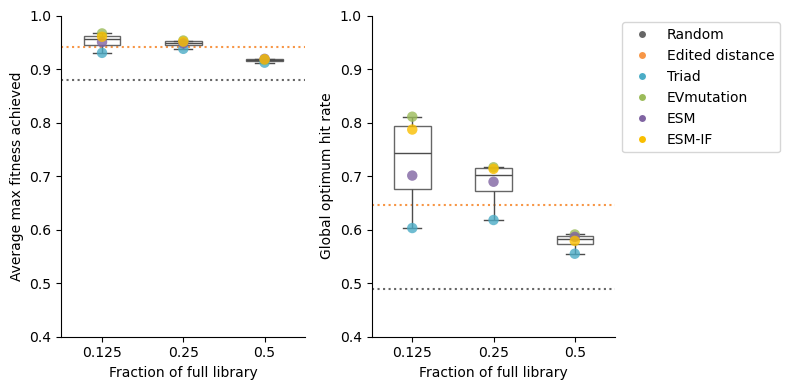

In [127]:
n_sample = 384

# mlde_color_list = ["yellow", "orange", "blue", "green", "purple", "red"]
ms = ["top_maxes_mean", "if_truemaxs_mean"]
titles = ["Average max fitness achieved", "Global optimum hit rate"]

slice_df = frac_ft_df[frac_ft_df["n_sample"] == n_sample].copy()

# Convert 'Category' column to categorical with defined order
slice_df['zs_'] = pd.Categorical(slice_df['zs_'], categories=list(five_zs.keys()), ordered=True)

# Sort DataFrame by 'Category'
slice_df = slice_df.sort_values(by='zs_')

fig, axes = plt.subplots(1, 2, figsize=(8, 4),)

for i, ax in enumerate(axes):

    ax.axhline(slice_df[slice_df["zs_"]=="none"][ms[i]].values[0], ls="dotted", color=five_zs["none"])
    ax.axhline(slice_df[slice_df["zs_"]=="ed_score"][ms[i]].values[0], ls="dotted", color=five_zs["ed_score"])

    sliced_df = slice_df[~slice_df["zs_"].isin(["none", "ed_score"])].copy()

    ax = sns.stripplot(
        data=sliced_df,
        x="ft_lib_size",
        y=ms[i],
        hue="zs_",
        size=7.5,
        alpha=0.8,
        jitter=False,
        # style="ft_lib_size",
        marker='o',
        ax=ax,
        palette=list(five_zs.values()),
    )
    # ax.set_xscale("symlog")

    sns.boxplot(
        x="ft_lib_size", 
        y=ms[i], 
        data=sliced_df,
        # showfliers=False,
        width=0.45, 
        boxprops={'facecolor': 'None', 'edgecolor': PRESENTATION_PALETTE_SATURATE["gray"]},
        # color=PRESENTATION_PALETTE_SATURATE["light_gray"],
        ax=ax,# palette="pastel", showmeans=True
        # order = np.linspace(0, 1, 9),
        # patch_artist=True
    )

    
    ax.set_xlabel("Fraction of full library")
    ax.set_ylabel(titles[i])
    # ax.set_title(titles[i])
    # ax.set_xlim(0, 1)
    ax.set_ylim(0.4, 1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # ax.set_xticks(sliced_df["ft_lib_size"].unique())
   
    
axes[0].legend_.remove()  # Remove legend from the first subplot
legend_list = []
for zs, c in five_zs.items():
    legend_list.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=c, # markersize=10,
    label=ZS_OPTS_APPENDED[zs]))
axes[1].legend(handles=legend_list, loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()

/tmp/ipykernel_1882059/1964576231.py:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
/tmp/ipykernel_1882059/1964576231.py:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


KeyError: 'Triad_score'

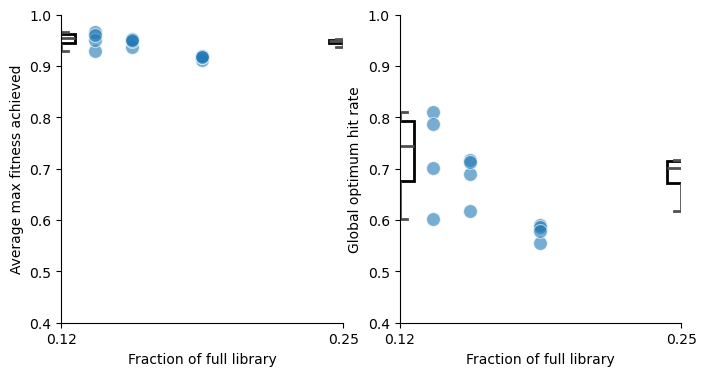

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assume frac_ft_df is already defined and five_zs, PRESENTATION_PALETTE_SATURATE, ZS_OPTS_APPENDED are properly set
n_sample = 384
ms = ["top_maxes_mean", "if_truemaxs_mean"]
titles = ["Average max fitness achieved", "Global optimum hit rate"]

# Sample dataframe structure
slice_df = frac_ft_df[frac_ft_df["n_sample"] == n_sample].copy()
slice_df['zs_'] = pd.Categorical(slice_df['zs_'], categories=list(five_zs.keys()), ordered=True)
slice_df.sort_values(by='zs_', inplace=True)

# Binning
bin_width = 0.01
bins = np.arange(0, 1 + bin_width, bin_width)
slice_df['bin'] = pd.cut(slice_df['ft_lib_size'], bins=bins, labels=bins[:-1], right=False)
slice_df['bin'] = slice_df['bin'].astype(float)  # Convert bin labels to float

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

for i, ax in enumerate(axes):
    # Scatter plot
    sns.scatterplot(
        data=slice_df[~slice_df["zs_"].isin(["none", "ed_score"])],
        x='bin', 
        y=ms[i],
        # hue='zs_',
        s=100,
        alpha=0.6,
        ax=ax,
        palette=list(five_zs.values()),
    )

    # Box plot with adjusted visibility
    sns.boxplot(
        x='bin', 
        y=ms[i], 
        data=slice_df[~slice_df["zs_"].isin(["none", "ed_score"])].dropna(),
        width=0.1, 
        boxprops={'facecolor': 'None', 'edgecolor': 'black'},
        fliersize=0,  # hide fliers
        linewidth=2,  # make lines thicker
        ax=ax
    )

    ax.set_xlabel("Fraction of full library")
    ax.set_ylabel(titles[i])
    ax.set_xlim(0, 1)
    ax.set_ylim(0.4, 1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Handle legends
# axes[0].legend_.remove()  # Remove legend from the first subplot
legend_list = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=c, label=ZS_OPTS_APPENDED[zs])
               for zs, c in five_zs.items()]
axes[1].legend(handles=legend_list, loc="upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


Text(0.5, 0.95, 'ftMLDE Varying Focused Libraries Fraction Across 10 Landscapes')

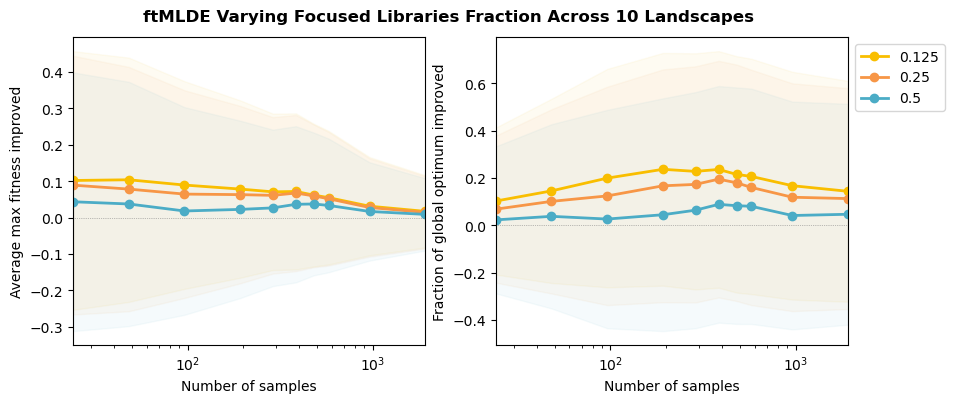

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
mlde_color_list = ["yellow", "orange", "blue"]

for ax, mlde_metric, de_metric, y_label in zip(
    axes,
    ["top_maxes", "if_truemaxs"],
    ["mean_all", "fraction_max"],
    ["Average max fitness", "Fraction of global optimum"],
):

    for i, (frac_ft, frac_ft_df) in enumerate(frac_ft_dict.items()):
        delta_df = frac_ft_df - random_avg

        ax.plot(
            delta_df.index,
            delta_df[f"{mlde_metric}_mean"],
            label=str(frac_ft),
            marker="o",
            linestyle="solid",
            linewidth=2,
            color=PRESENTATION_PALETTE_SATURATE[mlde_color_list[i]],
        )
        ax.fill_between(
            delta_df.index,
            delta_df[f"{mlde_metric}_mean"] - random_avg[f"{mlde_metric}_std"],
            delta_df[f"{mlde_metric}_mean"] + random_avg[f"{mlde_metric}_std"],
            color=PRESENTATION_PALETTE_SATURATE[mlde_color_list[i]],
            alpha=0.05,
        )
        
    # # add vline
    # ax.axvline(
    #     n_corr,
    #     color="gray",
    #     linewidth=0.5,
    #     linestyle="dotted"
    # )
    # add hline
    ax.axhline(
        0,
        color="gray",
        linewidth=0.5,
        linestyle="dotted"
    )

    ax.set_xlim(N_SAMPLE_LIST[0], N_SAMPLE_LIST[-1])
    # ax.set_ylim(0, 1.0)

    ax.set_xscale("log")
    ax.set_xlabel("Number of samples")
    ax.set_ylabel(f"{y_label} improved")

    if ax == axes[1]:
        ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

fig.suptitle(
    "ftMLDE Varying Focused Libraries Fraction Across 10 Landscapes", fontsize=12, fontweight="bold", y=0.95
)